# Capstone 3:  Climate Change Cause and Effect Relationships
##  ---    Exploratory Data Analysis ---

# 0. Import python libraries and Load wrangled data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
def plotSeriesTogether(df1, v1, lab1, df2, v2, lab2, title, ylabel, xlabel, fact1=1, fact2=1, ymax=450, ymin=0):
    fig = plt.figure(figsize=(10, 6))  
    plt.grid(True)
    plt.plot(df1.index, df1[v1] * fact1, label=lab1)
    plt.plot(df2.index, df2[v2] * fact2, label=lab2)
    plt.legend(loc='best', shadow=True)
    plt.title(title, fontsize=18)
    plt.ylabel(ylabel, fontsize=14)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylim([ymin, ymax])
    plt.plot();

In [64]:
EmissionsAnn= pd.read_csv('../Data/GasEmissions.csv', parse_dates=True, index_col=0)
Emis1958_Ann   = pd.read_csv('../Data/EmissionsSince1958.csv', parse_dates=True, index_col=0)
CO2      = pd.read_csv('../Data/CO2inAtmos.csv', parse_dates=True, index_col=0)
CO2Ann   = pd.read_csv('../Data/CO2Annual.csv', parse_dates=True, index_col=0)
LandTemp = pd.read_csv('../Data/LandTemp.csv', parse_dates=True, index_col=0)
LandTempAnn = pd.read_csv('../Data/LandTempAnnual.csv', parse_dates=True, index_col=0)
SeaTemp    = pd.read_csv('../Data/SeaTemp.csv', parse_dates=True, index_col=0)
SeaTempAnn = pd.read_csv('../Data/SeaTempAnnual.csv', index_col=0, parse_dates=True)
ArcIce   = pd.read_csv('../Data/ArcIce.csv', index_col=0, parse_dates=True)
ArcIceAnn = pd.read_csv('../Data/ArcIceAnnual.csv', index_col=0, parse_dates=True)
AntIce   = pd.read_csv('../Data/AntIce.csv', index_col=0, parse_dates=True)
AntIceAnn = pd.read_csv('../Data/AntIceAnnual.csv', index_col=0, parse_dates=True)


# 1. Analysis of The Source of CO2 and Its Air Concentration

We cannot confirm or reject the causality of CO<sub>2</sub> emissions on CO<sub>2</sub> concentrations in the air in this study.  We can analyze the correlation and make some inferences, insights and extrapolations from there.

The consensus causality is 
* Greenhouse Gases are produced and emitted into the air by power plants, factories, vehicles -->  
     * CO<sub>2</sub>, CH<sub>4</sub>, N<sub>2</sub>O and other greenhouse gas concentrations grow in the air around the planet -->
          * More solar rays reflected off the Earth are reflected back down by greenhouse gases -->
              * Earth land and sea temperatures rise, on average very slowly.              
              (The temperature rise signals are much smaller than the noise of monthly variations.) -->
                  * Air temperatures rise, on average very slowly, but it doesn't take much to change regional climates. -->
                  * Arctic and Antarctic Ocean ice shrinks  -->
                      * Darker liquid water absorbs more light and heat than lighter ice -->
                          * Many effects, most of them bad for the climate, people, and stability.
                              * Glaciers shrink and run off, turning ice into ocean water, raising sea level
                              * Ocean ice packs melting, partially counteracting the sea level rise because water                               takes up less volume than ice.
                              * More violent storms, hurricanes, tornadoes, snowstorms
                              * More erratic weather, sometimes drought, sometimes flooding
                              * Regional climates change, some become more arid, some wetter, some warmer
                              * Farming challenges to overcome various climate changes
                              * Property and infrastructure damage: flooded houses and septic tanks
                              * River changes, mudslides, disappearing coastal real estate
                          
We have time series data with very few missing values.  Most of the time series have monthly numbers available and some have daily numbers.  Unfortunately, the generation of excess CO<sub>2</sub> and other gases is only available as annual reports, compiled by industry producers of the gases and government agencies trying to keep track of the pollutants produced.

So we will begin our search for trends and correlations at the source with the Emissions and CO<sub>2</sub> time series.

Methane, Nitrous Oxide and other greenhouse gas concentration time series in the atmosphere are not available.

CO<sub>2</sub> concentrations are only available since March 1958, so we will do our comparison from that date.

## 1.1 Emissions and CO2 Time Series Graphs

In [65]:
CO2Ann.head(12)
print(type(CO2Ann.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [66]:
print(type(Emis1958_Ann.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [67]:
Emis1958_Ann


,country,Year,total_ghg,ghg_per_capita,co2,co2_growth_prct,co2_growth_abs,co2_per_capita,co2_per_gdp,co2_per_unit_energy,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
Date,,,,,,,,,,,,,,,,,,,
1958-01-01,World,1958,NaN,NaN,8412.113,2.85,232.773,2.875,NaN,NaN,NaN,NaN,NaN,NaN,2.925687e+09,NaN,NaN,NaN,NaN
1959-01-01,World,1959,NaN,NaN,8848.509,5.19,436.396,2.970,NaN,NaN,NaN,NaN,NaN,NaN,2.979576e+09,NaN,NaN,NaN,NaN
1960-01-01,World,1960,NaN,NaN,9334.894,5.50,486.386,3.076,0.705,NaN,NaN,NaN,NaN,NaN,3.034950e+09,1.324584e+13,NaN,NaN,NaN
1961-01-01,World,1961,NaN,NaN,9356.003,0.23,21.109,3.026,NaN,NaN,NaN,NaN,NaN,NaN,3.091844e+09,NaN,NaN,NaN,NaN
1962-01-01,World,1962,NaN,NaN,9687.509,3.54,331.506,3.075,NaN,NaN,NaN,NaN,NaN,NaN,3.150421e+09,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-01-01,World,2015,49854.98,6.756,35209.447,-0.10,-35.422,4.771,NaN,0.233,8660.01,1.173,3052.82,0.414,7.379797e+09,NaN,150882.037,20445.283,1.437
2016-01-01,World,2016,49358.03,6.613,35220.412,0.03,10.966,4.719,0.329,0.230,8550.06,1.146,3054.00,0.409,7.464022e+09,1.071343e+14,152944.938,20490.955,1.429
2017-01-01,World,2017,NaN,NaN,35696.349,1.35,475.936,4.729,0.323,0.229,NaN,NaN,NaN,NaN,7.547859e+09,1.104307e+14,155672.784,20624.761,NaN


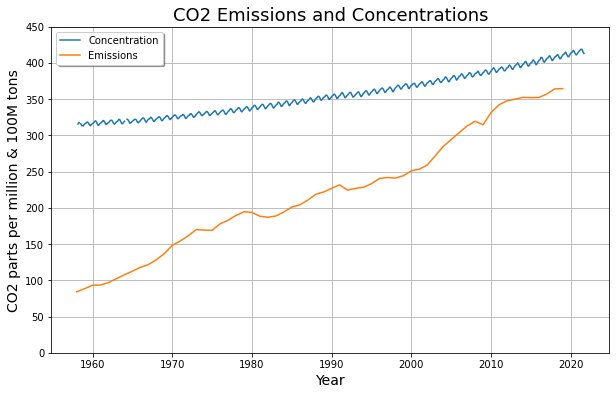

In [75]:
plotSeriesTogether(CO2, 'CO2 [ppm]', 'Concentration', Emis1958_Ann, 'co2', 'Emissions', 'CO2 Emissions and Concentrations', 'CO2 parts per million & 100M tons', 'Year', fact2=1/100, ymax=450)
